In [14]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from kneed import KneeLocator


In [15]:
df=pd.read_csv('crimes.csv',sep=';')
df.head(10)

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
5,Colorado,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
6,Connecticut,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
7,Delaware,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
8,Florida,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4
9,Georgia,11.7,31.1,140.5,256.5,1351.1,2170.2,297.9


In [16]:
df.describe()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.444000,25.73400,124.092000,211.300000,1291.904000,2671.288000,377.526000
std,3.866769,10.75963,88.348567,100.253049,432.455711,725.908707,193.394418
min,0.900000,9.00000,13.300000,43.800000,446.100000,1239.900000,144.400000
25%,4.225000,18.32500,64.950000,148.850000,1000.075000,2248.900000,245.775000
50%,7.300000,24.10000,106.050000,197.600000,1265.050000,2617.450000,333.850000
75%,10.100000,32.52500,155.850000,282.575000,1529.825000,3007.600000,460.125000
max,15.800000,51.60000,472.600000,485.300000,2453.100000,4467.400000,1140.100000


<AxesSubplot:>

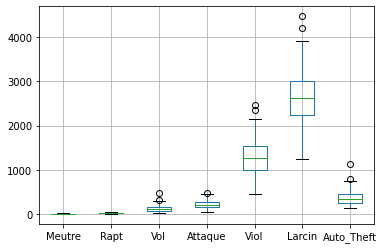

In [17]:
df.boxplot()

In [18]:
df.corr()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
Meutre,1.000000,0.601220,0.483708,0.648550,0.385817,0.101920,0.068814
Rapt,0.601220,1.000000,0.591879,0.740260,0.712130,0.613988,0.348902
Vol,0.483708,0.591879,1.000000,0.557078,0.637242,0.446740,0.590680
Attaque,0.648550,0.740260,0.557078,1.000000,0.622909,0.404363,0.275843
Viol,0.385817,0.712130,0.637242,0.622909,1.000000,0.792121,0.557953
Larcin,0.101920,0.613988,0.446740,0.404363,0.792121,1.000000,0.444180
Auto_Theft,0.068814,0.348902,0.590680,0.275843,0.557953,0.444180,1.000000


In [19]:
x = df.iloc[:,1:]
x.head()

,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [20]:
labels = df.iloc[:,0]
labels.head()
labels.shape

(50,)

In [21]:
sc=StandardScaler()
sc.fit(x)
Xsc=sc.transform(x)
Xsc

array([[ 1.76493364e+00, -5.01338300e-02, -3.12049014e-01,
         6.75093885e-01, -3.65336599e-01, -1.09848840e+00,
        -5.05748984e-01],
       [ 8.76719554e-01,  2.42839260e+00, -3.12049014e-01,
         7.32527245e-01,  9.29575669e-02,  9.72028118e-01,
         1.96277156e+00],
       [ 5.37108284e-01,  7.94818361e-01,  1.61306884e-01,
         1.01767884e+00,  2.46244585e+00,  2.49941500e+00,
         3.23707347e-01],
       [ 3.54240678e-01,  1.75186754e-01, -4.67547569e-01,
        -7.96006223e-02, -7.45846893e-01, -1.12604148e+00,
        -1.01397380e+00],
       [ 1.05958716e+00,  2.22184873e+00,  1.86264402e+00,
         1.47815333e+00,  1.97962524e+00,  1.15293218e+00,
         1.49372132e+00],
       [-2.98857917e-01,  1.52711026e+00,  5.32902698e-01,
         8.22203896e-01,  1.50264426e+00,  1.71429138e+00,
         5.20102549e-01],
       [-8.47460737e-01, -8.38755875e-01,  6.18335434e-02,
        -8.01044237e-01,  1.26360251e-01, -7.03967268e-02,
         1.1265249

In [22]:
pca=PCA()
x_pca = pca.fit_transform(Xsc)
pca.explained_variance_ratio_

array([0.58785136, 0.17696026, 0.10368809, 0.04520458, 0.03685349,
       0.03171992, 0.01772229])

In [23]:
labels[0]

'Alabama'

Text(0.5, 1.0, 'PCA projection')

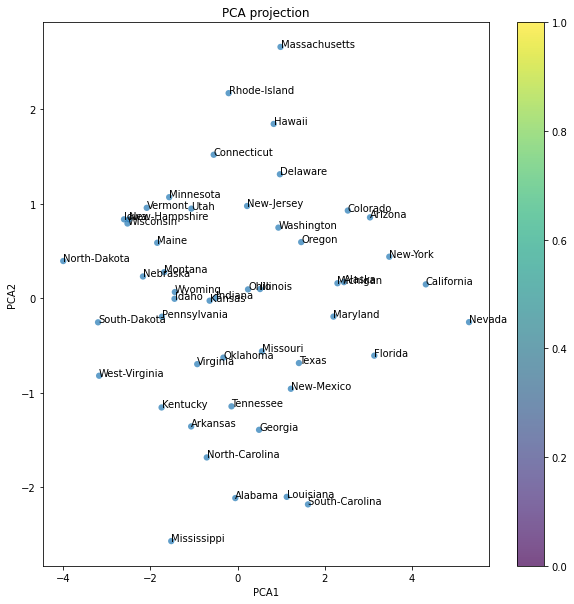

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:, 0], x_pca[:, 1], edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
for i in range (0,50):
    plt.annotate(labels[i], (x_pca[i,0],x_pca[i,1])) 
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.title('PCA projection')


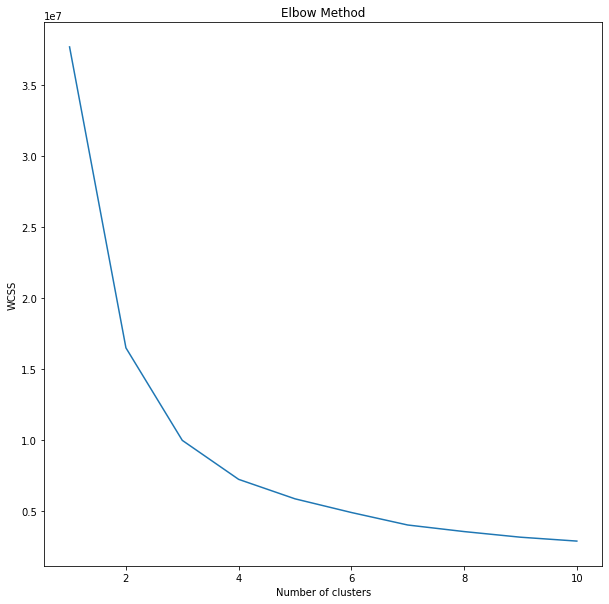

In [30]:
wcss = []
plt.figure(figsize=(10,10))

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

nombre de cluster : 3


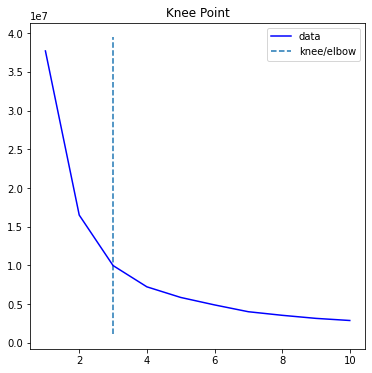

In [31]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')
print("nombre de cluster : {}".format(kneedle.elbow))
kneedle.plot_knee()

Text(0.5, 1.0, 'PCA projection')

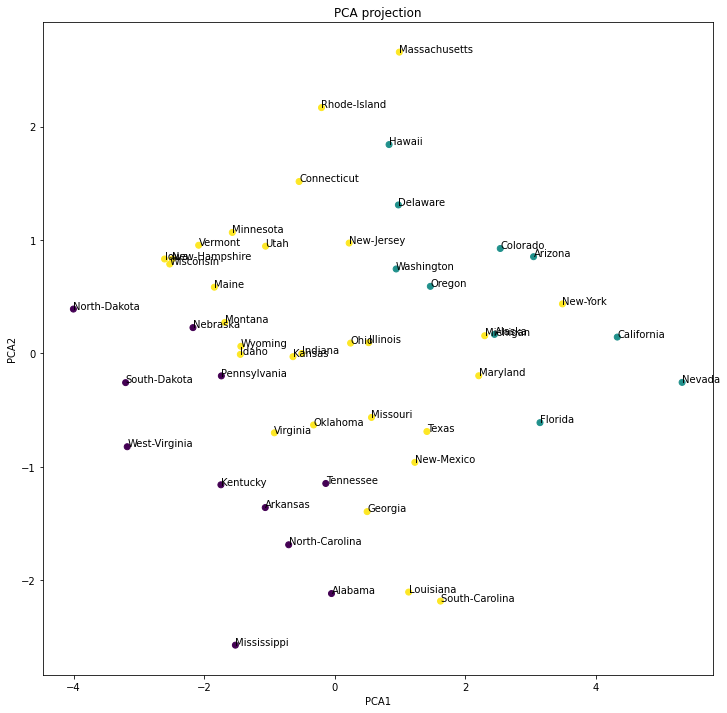

In [34]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(x)
plt.figure(figsize=(12,12))
plt.scatter(x_pca[:, 0], x_pca[:, 1],c=kmeans.labels_)
for i in range (0,50):
    plt.annotate(labels[i], (x_pca[i,0],x_pca[i,1]))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA projection')

Text(0.5, 1.0, 'PCA projection Xsc')

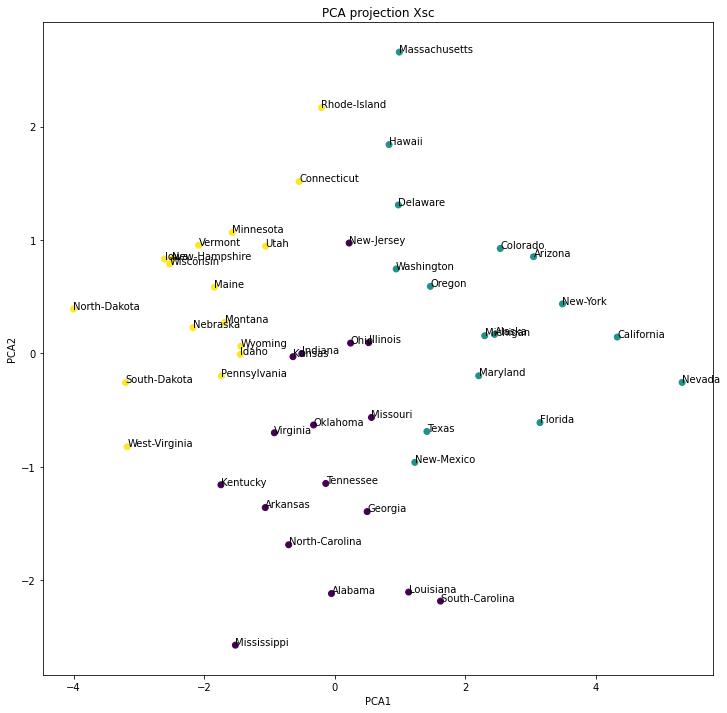

In [72]:
kmeans_scaled = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_scaled.fit(Xsc)
plt.figure(figsize=(12,12))
plt.scatter(x_pca[:, 0], x_pca[:, 1],c=kmeans_scaled.labels_)
for i in range (0,50):
    plt.annotate(labels[i], (x_pca[i,0],x_pca[i,1])) 
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA projection Xsc')


C:\Users\MSI\AppData\Local\Temp\ipykernel_14916\3138292474.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


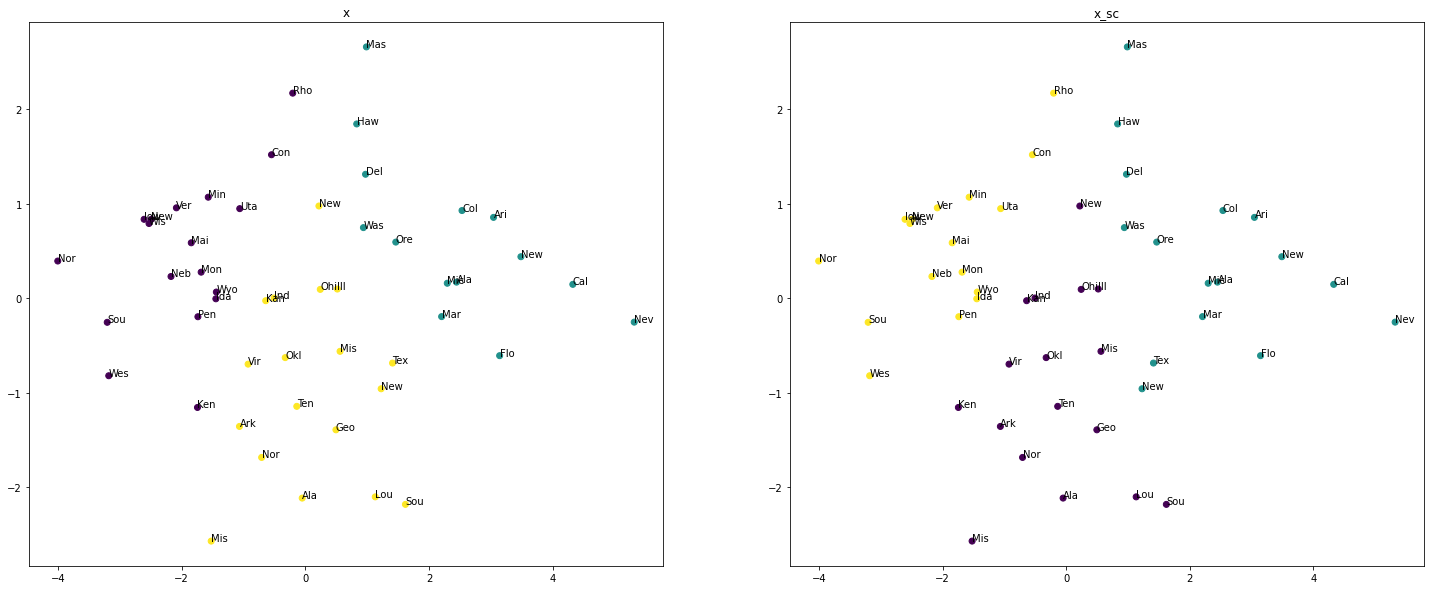

In [74]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(x_pca[:,:2])
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
ax1.set_title("x")
ax1.scatter(x_pca[:, 0], x_pca[:, 1],c=kmeans.labels_)
for i in range (0,50):
    ax1.annotate(labels[i][:3], (x_pca[i,0],x_pca[i,1]))
ax2.set_title("x_sc")
ax2.scatter(x_pca[:, 0], x_pca[:, 1],c=kmeans_scaled.labels_)
for i in range (0,50):
    ax2.annotate(labels[i][:3], (x_pca[i,0],x_pca[i,1]))

fig.show()

In [69]:
print(kmeans.labels_)
print(kmeans_scaled.labels_)

[2 1 1 2 1 1 0 1 1 2 1 0 2 2 0 2 0 2 0 1 1 1 0 2 2 0 0 1 0 2 2 1 2 0 2 2 1
 0 0 2 0 2 2 0 0 2 1 0 0 0]
[0 1 1 0 1 1 2 1 1 0 1 2 0 0 2 0 0 0 2 1 1 1 2 0 0 2 2 1 2 0 1 1 0 2 0 0 1
 2 2 0 2 0 1 2 2 0 1 2 2 2]


numpy.int32

In [64]:
labels[kmeans.labels_!=kmeans_scaled.labels_]

0             Alabama
3            Arkansas
6         Connecticut
9             Georgia
11              Idaho
12           Illinois
13            Indiana
14               Iowa
15             Kansas
17          Louisiana
18              Maine
22          Minnesota
23        Mississippi
24           Missouri
25            Montana
26           Nebraska
28      New-Hampshire
29         New-Jersey
30         New-Mexico
32    North-Carolina 
33       North-Dakota
34               Ohio
35           Oklahoma
37       Pennsylvania
38       Rhode-Island
39    South-Carolina 
40       South-Dakota
41          Tennessee
42              Texas
43               Utah
44            Vermont
45           Virginia
47      West-Virginia
48          Wisconsin
49            Wyoming
Name: Etat , dtype: object